<a href="https://colab.research.google.com/github/cmansoo/scratch/blob/main/classfiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, BatchNormalization, Conv2D, Dropout, Activation, Dense, Flatten, AveragePooling2D, InputLayer
from keras.models import Sequential
from keras.optimizers import SGD

In [37]:
# mount drive
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/SEIS 764/project")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'764 final project images'   funko_file_map.csv  'SEIS764 project.ipynb'
 data			     image_gen.ipynb	 'Untitled document.gdoc'


## Read Data and split

In [38]:
funko_df = pd.read_csv("funko_file_map.csv")
funko_df["Image Path"] = funko_df["Image Path"].str.replace("drive/MyDrive/SEIS764/", "")

# split
train_df, test_df = train_test_split(funko_df, test_size=0.2, random_state=100)
# train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=100)

In [40]:
print("train dataset", train_df.shape)
display(train_df)
# print("validation dataset", val_df.shape)
# display(val_df)
print("test dataset", test_df.shape)
display(test_df)

train dataset (212, 9)


,Image Path,Human,Gender,Facial Hair,Glasses,Hat,Item in hand,Sunny,Name
180,764 final project images/Towelie6.jpeg,False,m,False,False,False,False,False,Towelie
260,764 final project images/SteamBoatWilly4.jpeg,False,o,False,False,True,False,False,SteamBoatWilly
201,764 final project images/CokeBear7.jpeg,False,o,False,False,False,True,False,CokeBear
171,764 final project images/WildThing4.jpeg,False,o,True,False,False,False,False,WildThing
230,764 final project images/Max6.jpeg,False,o,False,False,False,False,False,Max
...,...,...,...,...,...,...,...,...,...
226,764 final project images/Max2.jpeg,False,o,False,False,False,False,False,Max
66,764 final project images/Gohan2.jpeg,True,m,False,False,True,False,False,Gohan
53,764 final project images/Grommit6.jpeg,False,o,False,False,False,False,False,Grommit
79,764 final project images/Vegeta8.jpeg,True,m,False,False,False,False,False,Vegeta


test dataset (53, 9)


,Image Path,Human,Gender,Facial Hair,Glasses,Hat,Item in hand,Sunny,Name
243,764 final project images/MrPB5.jpeg,False,o,False,False,True,True,False,MrPB
160,764 final project images/Tony.jpeg,True,m,False,False,False,True,False,Tony
257,764 final project images/Micky6.jpeg,False,o,False,False,True,False,False,Micky
256,764 final project images/SteamBoatWilly.jpeg,False,o,False,False,True,False,False,SteamBoatWilly
110,764 final project images/PickleRick3.jpeg,False,o,False,False,False,True,False,PickleRick
236,764 final project images/Rick.jpeg,True,m,False,False,False,True,False,Rick
52,764 final project images/Grommit4.jpeg,False,o,False,False,False,False,False,Grommit
263,764 final project images/SteamBoatWilly8.jpeg,False,o,False,False,True,False,False,SteamBoatWilly
97,764 final project images/Gimli5.jpeg,True,m,True,False,True,True,False,Gimli
245,764 final project images/MrPB4.jpeg,False,o,False,False,True,True,False,MrPB


## Image preprocessing

1. single label classifier on gender

In [54]:
# guide: https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
# guide2: https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1
# guide3: https://www.kaggle.com/code/dmitrypukhov/cnn-with-imagedatagenerator-flow-from-dataframe

num_classes = 3
batch_size = 10
target_size = (224, 224)
img_col_name = "Image Path"
y_label_cols = funko_df.columns[1:].to_list()

# generate image data
datagen = ImageDataGenerator(
    rescale=1./255, # standardize pixels
    # other ways to standardize,
    # featurewise_center=True,
    # featurewise_std_normalization=True
    # featurewise_center=False,
    # featurewise_std_normalization=False,
    # augmentation params
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # brightness_range=(0.2, 0.7),
    validation_split=0.2
)


# generate data
train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image Path",
    y_col="Gender",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    # class_mode="raw",
    # shuffle=False,
    shuffle=True,
    subset="training"
)

val_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="Image Path",
    y_col="Gender",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    # shuffle=False,
    shuffle=True,
    subset="validation"
)

# separate generator for test dataset
test_datagen = ImageDataGenerator(rescale=1./255.)

test_data = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="Image Path",
    y_col="Gender",
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 170 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.
Found 53 validated image filenames belonging to 3 classes.


In [55]:
# define model
model = Sequential()

# conv 1
model.add(InputLayer(input_shape = (224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=(7,7)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv 2
model.add(Conv2D(32, kernel_size=(5,5), strides=(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# conv 3
model.add(Conv2D(48, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten to add dense layers
model.add(Flatten())

# dense
model.add(Dense(units=3200, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=1600, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=800, activation="relu"))
# model.add(Dropout(0.1, name="dropout3"))
model.add(Dense(units=400, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=100, activation="relu"))
model.add(Dense(units=50, activation="relu"))
model.add(Dense(units=25, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

# compile
model.compile(loss="categorical_crossentropy", optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 218, 218, 16)      2368      
                                                                 
 batch_normalization_9 (Bat  (None, 218, 218, 16)      64        
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 218, 218, 16)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 109, 109, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 53, 53, 32)        12832     
                                                                 
 batch_normalization_10 (Ba  (None, 53, 53, 32)       

In [57]:
# guide: https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/#
model_history = model.fit(train_data, batch_size=batch_size,
                          epochs=10,
                          verbose=True,
                          validation_data=val_data)


# # using fit_generator?
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# model.fit_generator(generator=train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=10
# )

# model.evaluate_generator(generator=valid_generator,
# steps=STEP_SIZE_TEST)

# test_generator.reset()
# pred=model.predict_generator(test_generator,
# steps=STEP_SIZE_TEST,
# verbose=1)

# predicted_class_indices=np.argmax(pred,axis=1)

Epoch 1/10
17/17 [==============================] - 48s 3s/step - loss: 1.0484 - accuracy: 0.5353 - val_loss: 1.0649 - val_accuracy: 0.6429
Epoch 2/10
17/17 [==============================] - 46s 3s/step - loss: 0.8917 - accuracy: 0.6353 - val_loss: 1.0023 - val_accuracy: 0.6429
Epoch 3/10
17/17 [==============================] - 45s 3s/step - loss: 0.7724 - accuracy: 0.6471 - val_loss: 0.9468 - val_accuracy: 0.6429
Epoch 4/10
17/17 [==============================] - 45s 3s/step - loss: 0.7396 - accuracy: 0.6824 - val_loss: 0.9195 - val_accuracy: 0.6429
Epoch 5/10
17/17 [==============================] - 46s 3s/step - loss: 0.6957 - accuracy: 0.6765 - val_loss: 0.9073 - val_accuracy: 0.6429
Epoch 6/10
17/17 [==============================] - 45s 3s/step - loss: 0.6321 - accuracy: 0.7176 - val_loss: 0.8779 - val_accuracy: 0.6429
Epoch 7/10
17/17 [==============================] - 51s 3s/step - loss: 0.5973 - accuracy: 0.7294 - val_loss: 0.8898 - val_accuracy: 0.7381
Epoch 8/10
17/17 [==

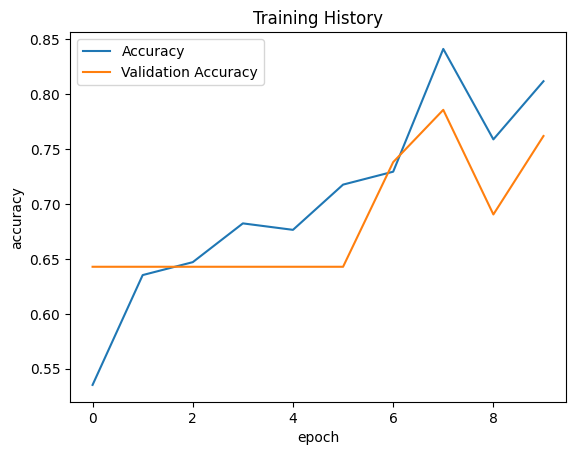

In [58]:
# plot model history
import matplotlib.pyplot as plt

# print(model_history.history)
plt.plot(model_history.history["accuracy"])
# plt.plot(model_history.history["loss"])
# plt.legend(labels=["Accuracy", "Loss"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(labels=["Accuracy", "Validation Accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Training History")
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# predictions on test data
train_data.reset()
test_data.reset()

test_pred = model.predict(test_data, verbose=True)
test_pred_labels = test_pred.argmax(axis=1)

print("predicted labels: \n", test_pred_labels)
print("\n test data labels:\n", test_data.labels)

accuracy2 = accuracy_score(test_data.labels, test_pred_labels)
cm2 = confusion_matrix(test_data.labels, test_pred_labels)
report2 = classification_report(test_data.labels, test_pred_labels)

print("\n accuracy score: ", round(accuracy2, 2))
print("\n confusion matrix: \n", cm2)
print("\n classification report", report2)

6/6 [==============================] - 8s 1s/step
predicted labels: 
 [1 1 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 2 1 1 2 1 2 2 1 1 1 1 2 1 1 1 1]

 test data labels:
 [2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1]

 accuracy score:  0.79

 confusion matrix: 
 [[ 0  3  0]
 [ 0 30  2]
 [ 0  6 12]]

 classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.94      0.85        32
           2       0.86      0.67      0.75        18

    accuracy                           0.79        53
   macro avg       0.54      0.53      0.53        53
weighted avg       0.76      0.79      0.76        53



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test dataset accuracy: 0.79


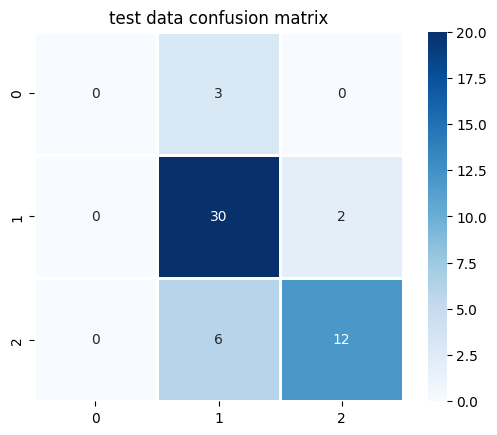

In [60]:
# test data
import seaborn as sns
cm_plot2 = sns.heatmap(cm2, linewidths=1, vmax=20,
                  square=True, cmap="Blues", annot=True)

print('test dataset accuracy:', round(accuracy2, 2))
plt.title("test data confusion matrix")
plt.show()